In [1]:
# loading the required libraries 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from geopy.distance import geodesic
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb


In [2]:
# Setting the working directory
os.chdir('C:/Users/akhil/Desktop/Kriti Data/EDWISOR_invoice/data science study material/Project\Project_2')

# Getting the working directory
os.getcwd()


'C:\\Users\\akhil\\Desktop\\Kriti Data\\EDWISOR_invoice\\data science study material\\Project\\Project_2'

In [3]:
# Importing dataset

Cab_Train_Data = pd.read_csv('train_cab.csv',dtype={'fare_amount':np.float64},na_values={'fare_amount':'430-'})
Cab_Test_Data = pd.read_csv('test.csv')


# Loading Train and Test data into data object
data=[Cab_Train_Data,Cab_Test_Data]
for i in data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')
    
    
#Viewing Train Data
Cab_Train_Data.head(5)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
#Getting information of the train dataset 
Cab_Train_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.8 KB


In [5]:
#Summary of the train dataset 
Cab_Train_Data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [6]:
#Veiwing test dataset
Cab_Test_Data.head(5)



,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
#Getting information of the test dataset 
Cab_Test_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [8]:
#Summary of the test dataset 
Cab_Test_Data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [9]:
############################## DATA VISUALIZATION #####################################################

# setting up the sns for plots
sns.set(style='darkgrid',palette='Set1')

C:\Users\akhil\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\akhil\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\akhil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\akhil\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


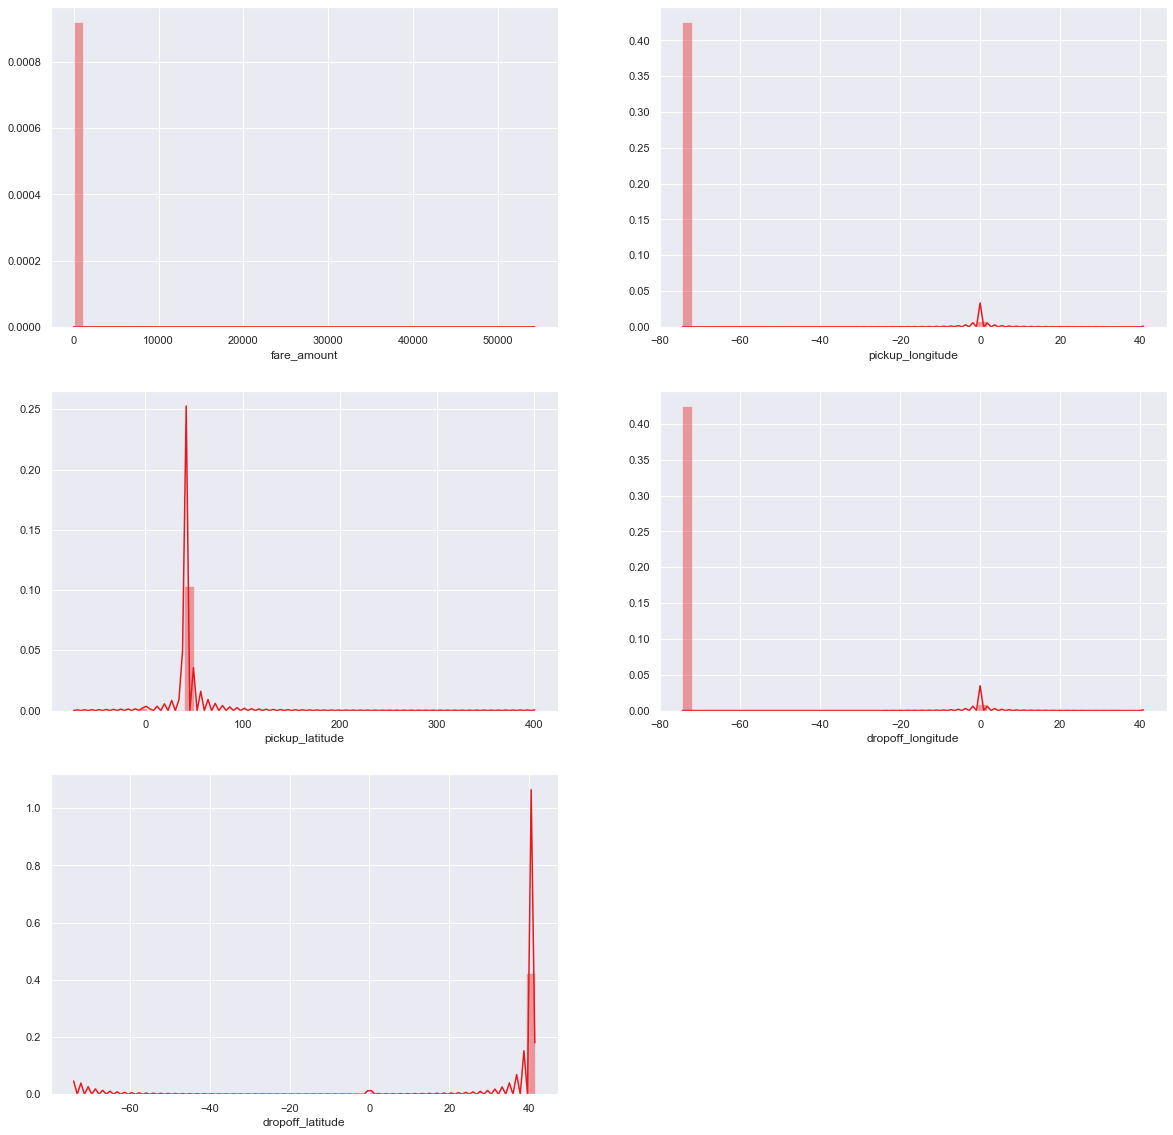

In [10]:

# Plotting histogram for variables of the train dataset
plt.figure(figsize=(20,20))
plt.subplot(321)
_ = sns.distplot(Cab_Train_Data['fare_amount'],bins=50)
plt.subplot(322)
_ = sns.distplot(Cab_Train_Data['pickup_longitude'],bins=50)
plt.subplot(323)
_ = sns.distplot(Cab_Train_Data['pickup_latitude'],bins=50)
plt.subplot(324)
_ = sns.distplot(Cab_Train_Data['dropoff_longitude'],bins=50)
plt.subplot(325)
_ = sns.distplot(Cab_Train_Data['dropoff_latitude'],bins=50)

#Saving Plots
#plt.savefig('histogrambypython.png')

#Displaying plots
plt.show()

In [11]:
####################################### EXPLORATORY DATA ANALYSIS ##########################################################

#Removing values which are not within desired range(outlier) depending upon basic understanding of dataset.

#1.Fare amount has a negative value, which do not make sense. A price amount cannot be negative and also cannot be 0. So we will remove these fields.

# Finding total number of observation have fare amount negative 
sum(Cab_Train_Data['fare_amount']<1)


5

In [12]:
#Getting records having fare amount in negatives
Cab_Train_Data[Cab_Train_Data['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [13]:
#Removing records having fare amount in negatives
Cab_Train_Data= Cab_Train_Data.drop(Cab_Train_Data[Cab_Train_Data['fare_amount']<1].index, axis=0)
Cab_Train_Data.loc[Cab_Train_Data['fare_amount'] < 1,'fare_amount'] = np.nan

In [14]:
#Checking for negative value in fare amount variable
sum(Cab_Train_Data['fare_amount']<1)

0

In [15]:
#2.Passenger_count variable needs to convert into a categorical variable because passenger_count is not a continuous variable.
# passenger_count cannot take continous values also they are limited in number if its a cab that is maximum number of passenger can sit in a cab is 6.

#Fetching records having passenger count greater than 4
for i in range(4,11):
    print('passenger_count above' +str(i)+'={}'.format(sum(Cab_Train_Data['passenger_count']>i)))

passenger_count above4=1367
passenger_count above5=322
passenger_count above6=20
passenger_count above7=20
passenger_count above8=20
passenger_count above9=20
passenger_count above10=20


In [16]:
#20 observations of passenger_count is consistenly above from 6,7,8,9,10 passenger_counts, let's check them.

Cab_Train_Data[Cab_Train_Data['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33+00:00,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00+00:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05+00:00,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05+00:00,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00+00:00,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00+00:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00+00:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29+00:00,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50+00:00,-73.988977,40.721068,-73.982368,40.732064,345.0


In [17]:
#Checking for any passenger_count<1
Cab_Train_Data[Cab_Train_Data['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0.00
566,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0.00
678,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0.00
1160,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0.00
1935,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0.00
2200,8.1,2011-05-23 16:54:19+00:00,-73.988008,40.748303,-74.005185,40.738733,0.00
2425,8.9,2011-11-25 22:47:33+00:00,-73.999900,40.738600,-73.971800,40.746300,0.00
3034,5.7,2011-03-06 12:03:14+00:00,-73.986557,40.745783,-73.994545,40.729995,0.00
3413,7.3,2011-02-28 06:39:16+00:00,-73.973413,40.743708,-73.985220,40.741583,0.00
3481,11.3,2011-11-30 17:23:02+00:00,-73.968100,40.762500,-73.984400,40.760900,0.00


In [18]:
#Finding total number of records having passenger_count<1
len(Cab_Train_Data[Cab_Train_Data['passenger_count']<1])

58

In [19]:
#Finding unique passenger count for train dataset
Cab_Train_Data['passenger_count'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 2.360e+02, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02,
       3.540e+02, 5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02,
       5.345e+03, 5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01,
       5.312e+02, 1.300e+00, 1.200e-01, 5.570e+02])

In [20]:
#Finding unique passenger count for test dataset
Cab_Test_Data['passenger_count'].unique()


array([1, 2, 3, 4, 5, 6], dtype=int64)

In [21]:
#passenger_count variable conains value  equal to 0 but test data does not contain passenger_count=0 .So, we will remove those 0 values.
#Also dropping 20 observations which are above 6  because a cab cannot hold number of passengers greater than 6 .

Cab_Train_Data = Cab_Train_Data.drop(Cab_Train_Data[Cab_Train_Data['passenger_count']>6].index, axis=0)
Cab_Train_Data = Cab_Train_Data.drop(Cab_Train_Data[Cab_Train_Data['passenger_count']<1].index, axis=0)



In [22]:

#Check for passenger_count>6
sum(Cab_Train_Data['passenger_count']>6)

0

In [23]:
#3.Latitudes range should be  from -90 to 90 and Longitudes range should be from -180 to 180. Removing which does not satisfy these ranges

#Getting data for checking ranges 
print('pickup_longitude above 180={}'.format(sum(Cab_Train_Data['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(Cab_Train_Data['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(Cab_Train_Data['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(Cab_Train_Data['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(Cab_Train_Data['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(Cab_Train_Data['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(Cab_Train_Data['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(Cab_Train_Data['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [24]:
#Only one outlier which is in variable pickup_latitude.So we will remove it with nan.


In [25]:
#Checking for any values equal to 0.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(Cab_Train_Data[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [26]:
#Removing values =0 with NA
Cab_Train_Data= Cab_Train_Data.drop(Cab_Train_Data[Cab_Train_Data['pickup_latitude']>90].index, axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    Cab_Train_Data = Cab_Train_Data.drop(Cab_Train_Data[Cab_Train_Data[i]==0].index, axis=0)
    


In [27]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    Cab_Train_Data.loc[Cab_Train_Data[i]==0,i] = np.nan
Cab_Train_Data.loc[Cab_Train_Data['pickup_latitude']>90,'pickup_latitude'] = np.nan



#Getting dimension of train data
Cab_Train_Data.shape

(15661, 7)

In [28]:
################################### MISSING VALUE ANALYSIS ########################################################


#Create dataframe with missing percentage
missing_val = pd.DataFrame(Cab_Train_Data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [29]:
# we can see there are some missing values in the data.
#We will impute missing values for fare_amount,passenger_count variables & will drop that 1 row which has missing value in pickup_datetime.


#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(Cab_Train_Data))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,passenger_count,0.351191
1,fare_amount,0.140476
2,pickup_datetime,0.006385
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [30]:
#Imputing missing values of the variable passenger_count and fare_amount variable using mean and median method 
#Not using KNN method for computation because unable to install fancyimpute package .I tried alot even perform many time of installing and uninstalling of the python
#Not using Mode method for passenger_count variable because it was showing biasing towards passenger_count =1

# Choosing a random values to replace it as NA
# Cab_Train_Data['fare_amount'].loc[1000]

In [31]:
# Replacing 7.0 with NA
#Cab_Train_Data['fare_amount'].loc[1000] = np.nan
#Cab_Train_Data['fare_amount'].loc[1000]

 

In [32]:
#Imputing by mean method
#print('Value imputed by mean:{}'.format(Cab_Train_Data['fare_amount'].fillna(Cab_Train_Data['fare_amount'].mean()).loc[1000]))

In [33]:
# Imputing by median method
#print('Value imputed by median:{}'.format(Cab_Train_Data['fare_amount'].fillna(Cab_Train_Data['fare_amount'].median()).loc[1000]))

#Missing value computed by different methods:

# Actual value = 7.0
# Mean = 15.117
# Median = 8.5


#we will separate pickup_datetime into a different dataframe and then merge with train in feature engineering step.
pickup_datetime=pd.DataFrame(Cab_Train_Data['pickup_datetime'])



In [34]:
#dropping pickup_datetime variable from train dataset
Cab_Train_Data=Cab_Train_Data.drop('pickup_datetime',axis=1)


In [35]:
#Checking dimensions of the train dataset
Cab_Train_Data.shape

(15661, 6)

In [36]:

#Since value computed by median method is more closer to the actual value when compared to mean method so will be using median method to compute missing values present in the dataset.
Cab_Train_Data["fare_amount"]=Cab_Train_Data["fare_amount"].fillna(Cab_Train_Data["fare_amount"].median())
Cab_Train_Data["passenger_count"]=Cab_Train_Data["passenger_count"].fillna(Cab_Train_Data["passenger_count"].median())

#Checking the number of missing values in the variables after computing missing value.
Miss_value=pd.DataFrame(Cab_Train_Data.isnull().sum())
Miss_value



,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [37]:
#Not computing missing value present in the variable pickup_datetime because this variable will undergo in feature engineering step ,if we compute it now than we will need to compute it twice before and after feature engineering process.


In [38]:
#Viewing records of the dataset
Cab_Train_Data['passenger_count'].head()

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: passenger_count, dtype: float64

In [39]:
#Converting float into int datatype
Cab_Train_Data['passenger_count']=Cab_Train_Data['passenger_count'].astype('int')

#viewing unique passenger_count 
Cab_Train_Data['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4], dtype=int64)

In [40]:
#Converting numerical datatype into categorical datatype
Cab_Train_Data['passenger_count']=Cab_Train_Data['passenger_count'].round().astype('object').astype('category')

#viewing unique passenger_count 
Cab_Train_Data['passenger_count'].unique()

[1, 2, 3, 6, 5, 4]
Categories (6, int64): [1, 2, 3, 6, 5, 4]

In [41]:
# missing value in pickup_datetime variable

#Create dataframe with missing percentage
missing_val = pd.DataFrame(pickup_datetime.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val


,index,0
0,pickup_datetime,1


In [42]:
#Dimension of pickup_datetime variable
pickup_datetime.shape

(15661, 1)

In [43]:
#Checking dimension of the train dataset
Cab_Train_Data.shape

(15661, 6)

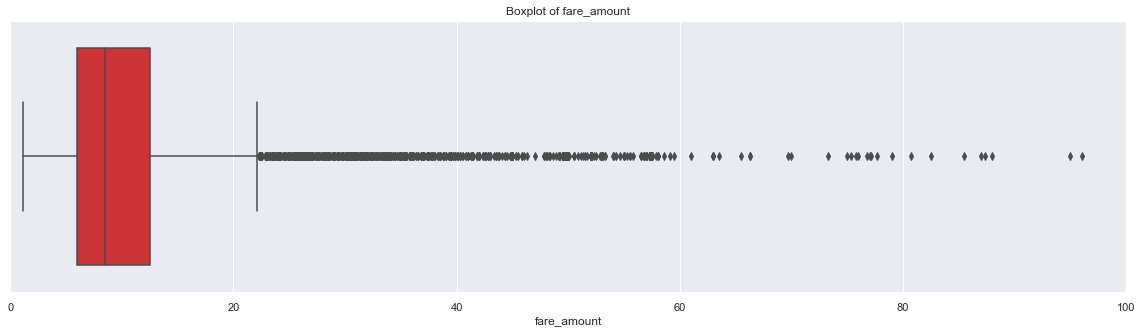

In [44]:
##################################### OUTLIER ANALYSIS ###################################################################

#Outlier anaysis on fare_amount variable
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=Cab_Train_Data['fare_amount'],data=Cab_Train_Data,orient='h')
plt.title('Boxplot of fare_amount')
#plt.savefig('bp_of_fare_amount_python.png')
plt.show()


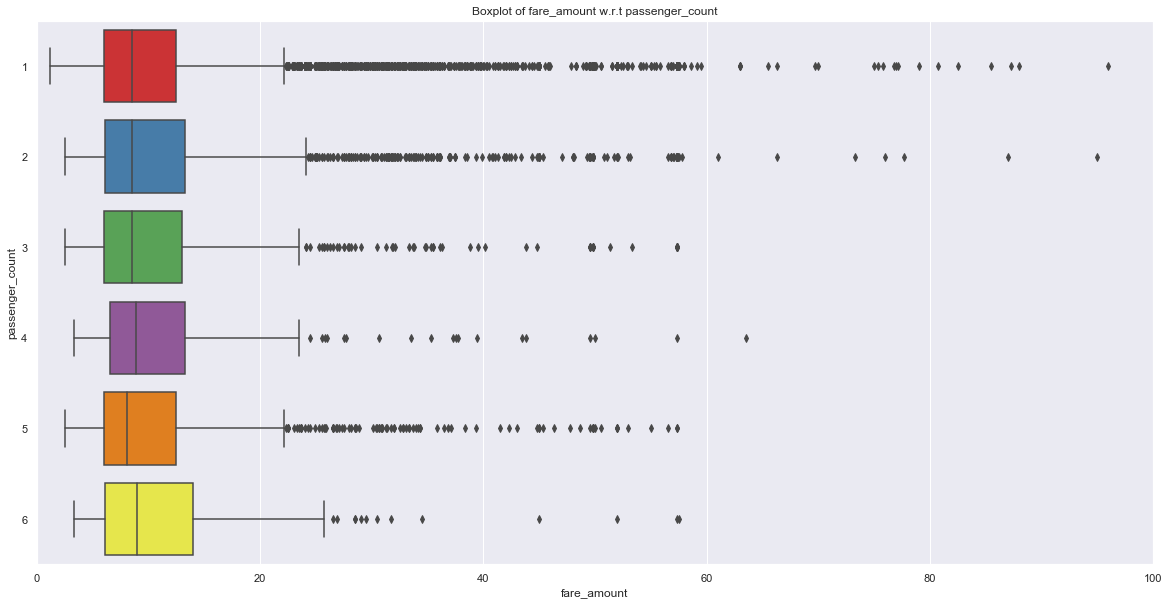

In [45]:
#Bivariate Boxplots(Boxplot for Numerical Variable Vs Categorical Variable)

plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=Cab_Train_Data['fare_amount'],y=Cab_Train_Data['passenger_count'],data=Cab_Train_Data,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')
#plt.savefig('Boxplot_of_fare_amount_w.r.t_passenger_count_python.png')
plt.show()

In [46]:
#Calculating outlier and replacing them with NA

def outlier_treatment(col):
    
    #Extract quartiles
    q75, q25 = np.percentile(Cab_Train_Data[col], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    Cab_Train_Data.loc[Cab_Train_Data[col] < minimum,col] = np.nan
    Cab_Train_Data.loc[Cab_Train_Data[col] > maximum,col] = np.nan

In [47]:
#Outlier analysis
outlier_treatment('fare_amount')
outlier_treatment('pickup_longitude')
outlier_treatment('pickup_latitude')
outlier_treatment('dropoff_longitude')
outlier_treatment('dropoff_latitude')

12.5 6.0
-3.75 22.25
-73.96808 -73.99239
-74.028855 -73.931615
40.767804999999996 40.7365303
40.68961825 40.81471704999999
-73.96536 -73.99136899999999
-74.03038249999997 -73.92634650000002
40.768312 40.736292999999996
40.68826449999999 40.81634050000001


In [48]:
#Check for null values generated by outliers
pd.DataFrame(Cab_Train_Data.isnull().sum())

,0
fare_amount,1358
pickup_longitude,805
pickup_latitude,510
dropoff_longitude,920
dropoff_latitude,754
passenger_count,0


In [49]:
#Computing missing valuess generated by outlier analysis.
#Since value computed by median method is more closer to the actual value when compared to mean method so will be using median method to compute missing values present in the dataset.
Cab_Train_Data["fare_amount"]=Cab_Train_Data["fare_amount"].fillna(Cab_Train_Data["fare_amount"].median())
Cab_Train_Data["pickup_longitude"]=Cab_Train_Data["pickup_longitude"].fillna(Cab_Train_Data["pickup_longitude"].median())
Cab_Train_Data["pickup_latitude"]=Cab_Train_Data["pickup_latitude"].fillna(Cab_Train_Data["pickup_latitude"].median())
Cab_Train_Data["dropoff_latitude"]=Cab_Train_Data["dropoff_latitude"].fillna(Cab_Train_Data["dropoff_latitude"].median())
Cab_Train_Data["dropoff_longitude"]=Cab_Train_Data["dropoff_longitude"].fillna(Cab_Train_Data["dropoff_longitude"].median())


#Checking the number of missing values in the variables after computing missing value.
Miss_value=pd.DataFrame(Cab_Train_Data.isnull().sum())
Miss_value

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [50]:
Cab_Train_Data['passenger_count'].describe()


count     15661
unique        6
top           1
freq      11071
Name: passenger_count, dtype: int64

In [51]:
#Converting numerical datatype into categorical datatype
Cab_Train_Data['passenger_count']=Cab_Train_Data['passenger_count'].astype('int').round().astype('object').astype('category')


In [52]:
#Checking data of passenger_count variable
Cab_Train_Data['passenger_count']


0        1
1        1
2        2
3        1
4        1
        ..
16062    1
16063    2
16064    1
16065    1
16066    1
Name: passenger_count, Length: 15661, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [53]:
############################################# FEATURE ENGINEERING ####################################################

#Deriving new features from pickup_datetime variables like year,month,day_of_week,hour

#Joining two Dataframes pickup_datetime and train
Cab_Train_Data = pd.merge(pickup_datetime,Cab_Train_Data,right_index=True,left_index=True)
Cab_Train_Data.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,4.5,-73.982672,40.721319,-73.981637,40.712278,1
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [54]:
#Check for NA values
pd.DataFrame(Cab_Train_Data.isna().sum())

,0
pickup_datetime,1
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [55]:
#Droping NA's
Cab_Train_Data=Cab_Train_Data.dropna()

In [56]:
#Driving new feature
data=[Cab_Train_Data,Cab_Test_Data]
for i in data:
    i["year"] = i["pickup_datetime"].apply(lambda row: row.year)
    i["month"] = i["pickup_datetime"].apply(lambda row: row.month)
    i["day_of_week"] = i["pickup_datetime"].apply(lambda row: row.dayofweek)
    i["hour"] = i["pickup_datetime"].apply(lambda row: row.hour)

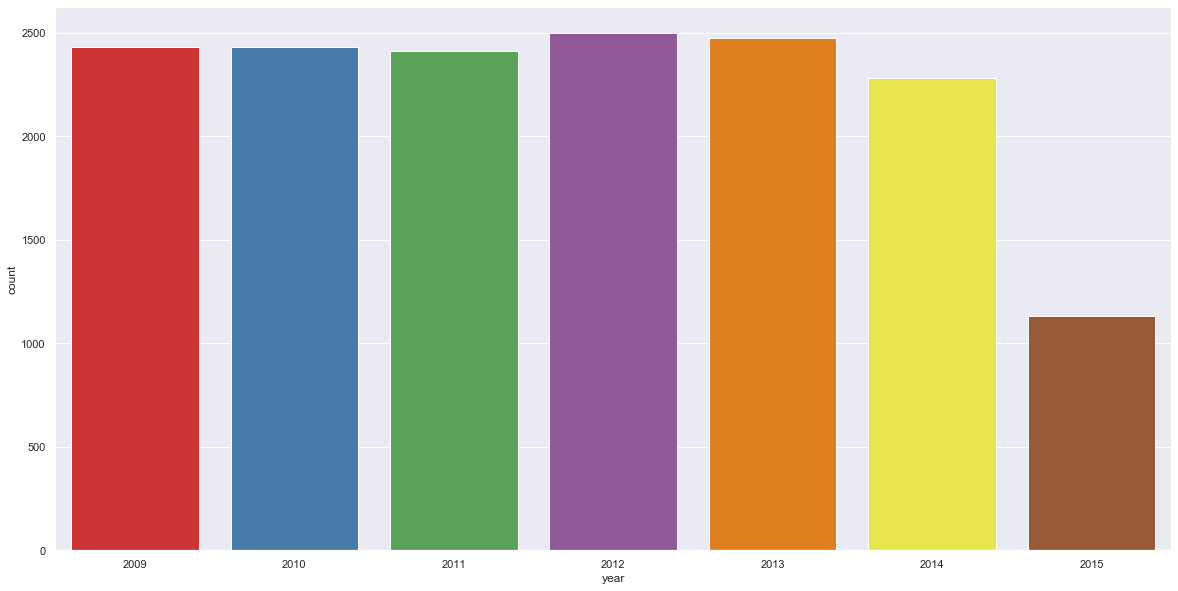

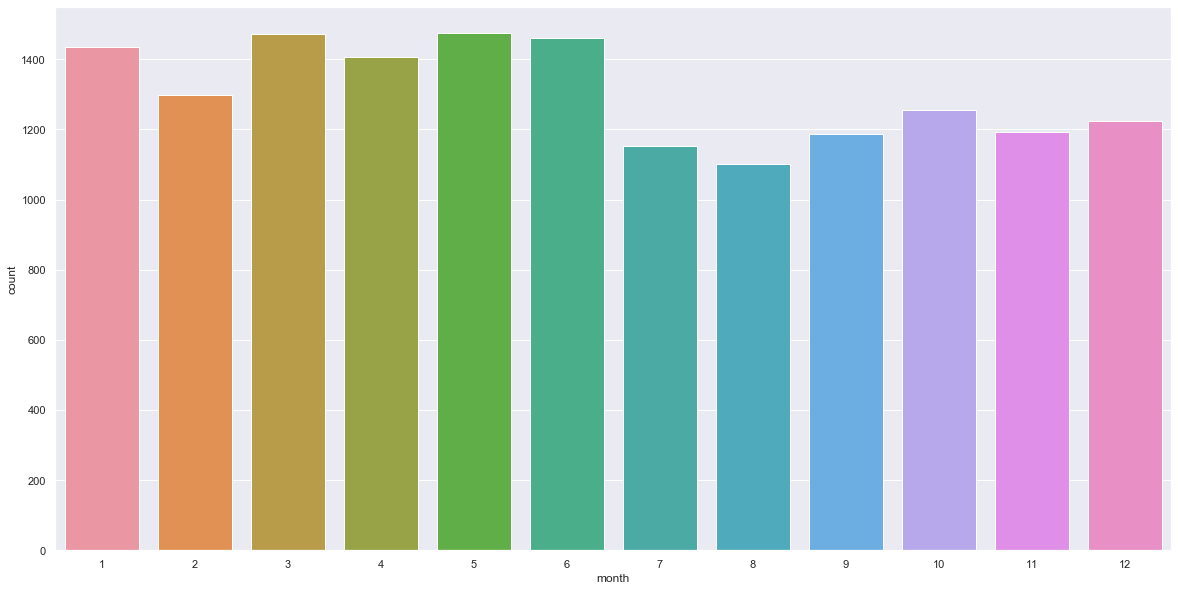

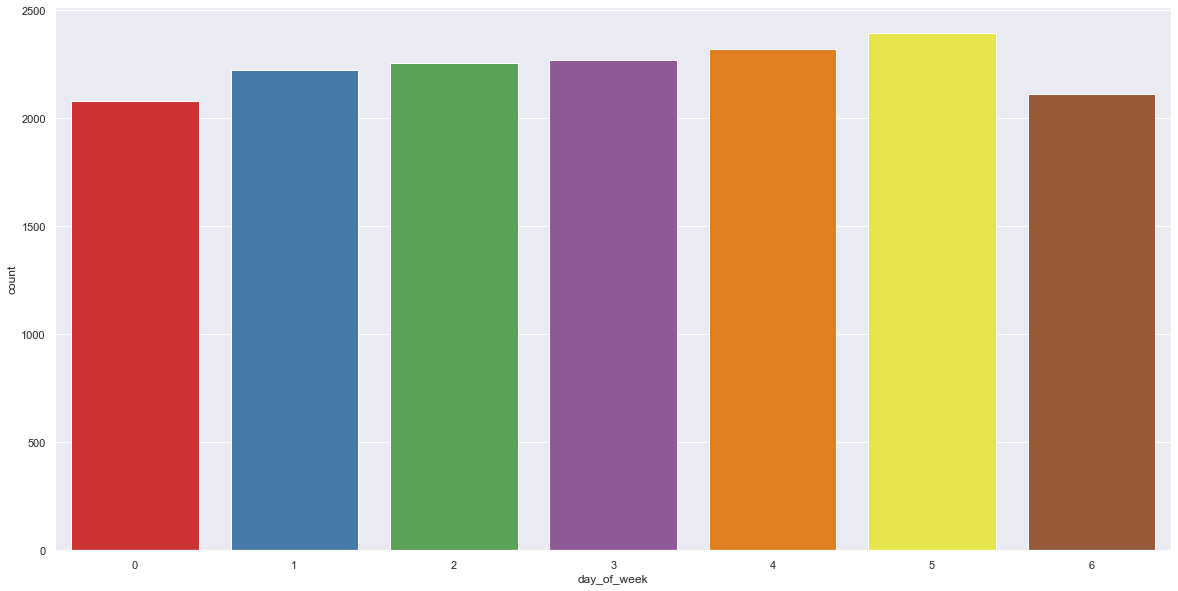

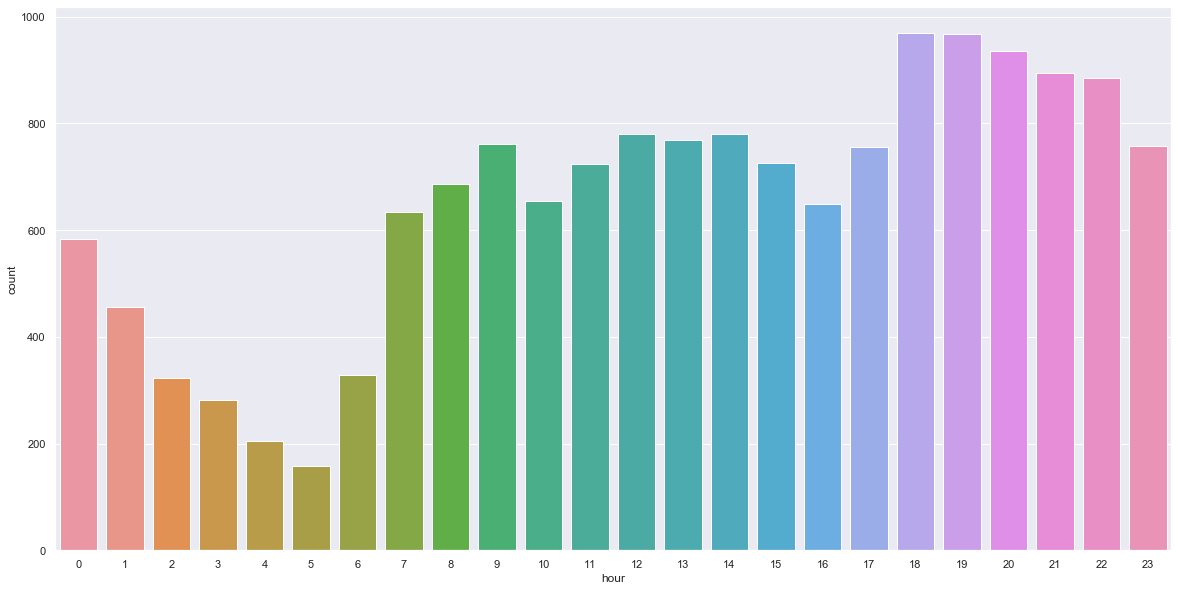

In [57]:
#Plotting new features
plt.figure(figsize=(20,10))
sns.countplot(Cab_Train_Data['year'])
#plt.savefig('year_python.png')

plt.figure(figsize=(20,10))
sns.countplot(Cab_Train_Data['month'])
#plt.savefig('month_python.png')

plt.figure(figsize=(20,10))
sns.countplot(Cab_Train_Data['day_of_week'])
#plt.savefig('day_of_week_python.png')

plt.figure(figsize=(20,10))
sns.countplot(Cab_Train_Data['hour'])
#plt.savefig('hour_python.png')

In [58]:
#Using month,day_of_week,hour for deriving new features like sessions in a day,seasons in a year,week:weekend/weekday


In [59]:
#function for sessions in a day using hour variable
def session(x):
    if (x >=5) and (x <= 11):
        return 'morning'
    elif (x >=12) and (x <=16 ):
        return 'afternoon'
    elif (x >= 17) and (x <= 20):
        return'evening'
    elif (x >=21) and (x <= 23) :
        return 'night_PM'
    elif (x >=0) and (x <=4):
        return'night_AM'

In [60]:
#function for seasons in a year using month variable
def season(x):
    if (x >=3) and (x <= 5):
        return 'spring'
    elif (x >=6) and (x <=8 ):
        return 'summer'
    elif (x >= 9) and (x <= 11):
        return 'fall'
    elif (x >=12)|(x <= 2) :
        return 'winter'

In [61]:
#function for weekday/weekend in a day_of_week variable
def day(x):
    if (x >=0) and (x <= 4):
        return 'weekday'
    elif (x >=5) and (x <=6 ):
        return 'weekend'

In [62]:
#Using session function for deriving session variable from hour
Cab_Train_Data['session'] = Cab_Train_Data['hour'].apply(session)
Cab_Test_Data['session'] = Cab_Test_Data['hour'].apply(session)

In [63]:
#Using seasons function for deriving season variable from month
Cab_Train_Data['seasons'] =Cab_Train_Data['month'].apply(season)
Cab_Test_Data['seasons'] = Cab_Test_Data['month'].apply(season)

In [64]:
#Using day function for deriving day variable from day_of_week
Cab_Train_Data['week'] = Cab_Train_Data['day_of_week'].apply(day)
Cab_Test_Data['week'] = Cab_Test_Data['day_of_week'].apply(day)

In [65]:
#Checking dimensions of train data
Cab_Train_Data.shape

(15660, 14)

In [66]:
#Checking dimensions of test data
Cab_Test_Data.shape

(9914, 13)

In [67]:
#2.Feature Engineering for passenger_count variable
#Models in scikit learn require numerical input,if dataset contains categorical variables then we have to encode them,using one hot encoding technique for passenger_count variable.

temp = pd.get_dummies(Cab_Train_Data['passenger_count'], prefix = 'passenger_count')
Cab_Train_Data =Cab_Train_Data.join(temp)
temp = pd.get_dummies(Cab_Test_Data['passenger_count'], prefix = 'passenger_count')
Cab_Test_Data = Cab_Test_Data.join(temp)

temp = pd.get_dummies(Cab_Train_Data['seasons'], prefix = 'season')
Cab_Train_Data = Cab_Train_Data.join(temp)
temp = pd.get_dummies(Cab_Test_Data['seasons'], prefix = 'season')
Cab_Test_Data = Cab_Test_Data.join(temp)

temp = pd.get_dummies(Cab_Train_Data['week'], prefix = 'week')
Cab_Train_Data = Cab_Train_Data.join(temp)
temp = pd.get_dummies(Cab_Test_Data['week'], prefix = 'week')
Cab_Test_Data = Cab_Test_Data.join(temp)

temp = pd.get_dummies(Cab_Train_Data['session'], prefix = 'sessions')
Cab_Train_Data = Cab_Train_Data.join(temp)
temp = pd.get_dummies(Cab_Test_Data['session'], prefix = 'sessions')
Cab_Test_Data = Cab_Test_Data.join(temp)

temp = pd.get_dummies(Cab_Train_Data['year'], prefix = 'year')
Cab_Train_Data = Cab_Train_Data.join(temp)
temp = pd.get_dummies(Cab_Test_Data['year'], prefix = 'year')
Cab_Test_Data = Cab_Test_Data.join(temp)

In [68]:
#Viewing records of train data
Cab_Train_Data.head(5)

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,...,sessions_morning,sessions_night_AM,sessions_night_PM,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,2009-06-15 17:26:21+00:00,4.5,-73.982672,40.721319,-73.981637,40.712278,1,2009,6,0,...,0,0,0,1,0,0,0,0,0,0
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,...,0,0,0,0,1,0,0,0,0,0
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,...,0,1,0,0,0,1,0,0,0,0
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,...,0,1,0,0,0,0,1,0,0,0
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,...,1,0,0,0,1,0,0,0,0,0


In [69]:
#Viewing records of test data
Cab_Test_Data.head(5)


,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour,...,sessions_morning,sessions_night_AM,sessions_night_PM,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,...,0,0,0,0,0,0,0,0,0,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,...,0,0,0,0,0,0,0,0,0,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,...,1,0,0,0,0,1,0,0,0,0
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,...,0,0,1,0,0,0,1,0,0,0
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,...,0,0,1,0,0,0,1,0,0,0


In [70]:
#Getting column names of train data
Cab_Train_Data.columns

Index(['pickup_datetime', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'week_weekday', 'week_weekend', 'sessions_afternoon',
       'sessions_evening', 'sessions_morning', 'sessions_night_AM',
       'sessions_night_PM', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015'],
      dtype='object')

In [71]:
#Getting column names of test data
Cab_Test_Data.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'week_weekday', 'week_weekend', 'sessions_afternoon',
       'sessions_evening', 'sessions_morning', 'sessions_night_AM',
       'sessions_night_PM', 'year_2009', 'year_2010', 'year_2011', 'year_2012',
       'year_2013', 'year_2014', 'year_2015'],
      dtype='object')

In [72]:
#drop one column from each one-hot-encoded variables

Cab_Train_Data=Cab_Train_Data.drop(['passenger_count_1','season_fall','week_weekday','sessions_afternoon','year_2009'],axis=1)
Cab_Test_Data=Cab_Test_Data.drop(['passenger_count_1','season_fall','week_weekday','sessions_afternoon','year_2009'],axis=1)

In [73]:
#3.Feature Engineering for latitude and longitude variable
#finding the distance the cab travelled from pickup and dropoff longitudes and latitudes.

# Calculate distance the cab travelled from pickup and dropoff location geodesic from geopy library
data=[Cab_Train_Data,Cab_Test_Data]
for i in data:
    i['distance']=i.apply(lambda x: geodesic((x['pickup_latitude'],x['pickup_longitude']), (x['dropoff_latitude'],   x['dropoff_longitude'])).miles, axis=1)

In [74]:
#Removing variables which were used to feature engineer new variables
Cab_Train_Data=Cab_Train_Data.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week'],axis=1)

Cab_Test_Data=Cab_Test_Data.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'session', 'seasons', 'week'],axis=1)

In [75]:
#Getting dimensions of train dataset
Cab_Train_Data.shape


(15660, 21)

In [76]:
#Getting dimensions of test dataset
Cab_Test_Data.shape


(9914, 20)

In [77]:
Cab_Train_Data.head()

,fare_amount,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,season_spring,season_summer,season_winter,week_weekend,...,sessions_morning,sessions_night_AM,sessions_night_PM,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,distance
0,4.5,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.626211
1,16.9,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,5.246511
2,5.7,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0.863167
3,7.7,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1.737223
4,5.3,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1.241710


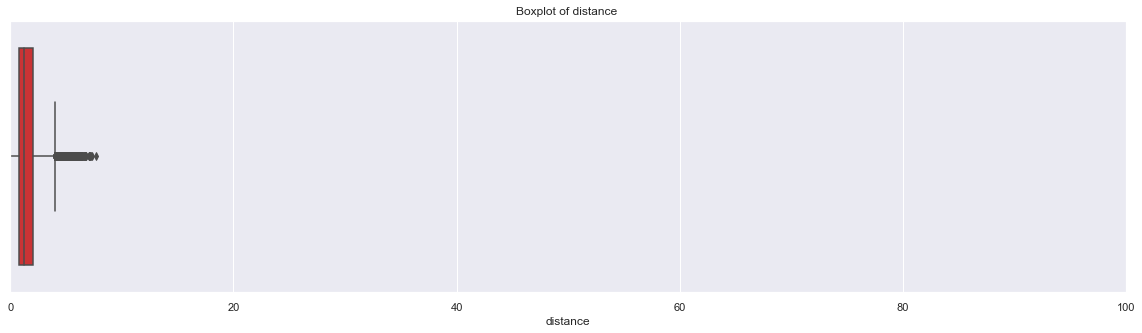

In [78]:
#Check for outliers in distance variable

plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=Cab_Train_Data['distance'],data=Cab_Train_Data,orient='h')
plt.title('Boxplot of distance ')
#plt.savefig('bp_distance_python.png')
plt.show()

In [79]:
#Calling outlier function and replacing outliers with NA
outlier_treatment('distance')

2.05902282680983 0.7455875019957124
-1.224565485225464 4.0291758140310066


In [80]:
#Check for NA values
pd.DataFrame(Cab_Train_Data.isnull().sum())

,0
fare_amount,0
passenger_count_2,0
passenger_count_3,0
passenger_count_4,0
passenger_count_5,0
passenger_count_6,0
season_spring,0
season_summer,0
season_winter,0
week_weekend,0


In [81]:
#Computing missing valuess generated by outlier analysis.
#Since value computed by median method is more closer to the actual value when compared to mean method so will be using median method to compute missing values present in the dataset.
Cab_Train_Data["distance"]=Cab_Train_Data["distance"].fillna(Cab_Train_Data["distance"].median())

#Checking the number of missing values in the variables after computing missing value.
Miss_value=pd.DataFrame(Cab_Train_Data.isnull().sum())
Miss_value

,0
fare_amount,0
passenger_count_2,0
passenger_count_3,0
passenger_count_4,0
passenger_count_5,0
passenger_count_6,0
season_spring,0
season_summer,0
season_winter,0
week_weekend,0


In [82]:
##################################### FEATURE SELECTION #########################################################

#List of categorical variable 
cat_var=['passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'season_spring', 'season_summer',
       'season_winter', 'week_weekend',
       'sessions_evening', 'sessions_morning', 'sessions_night_AM',
       'sessions_night_PM', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015']

#List of numerical variable
num_var=['fare_amount','distance']

Cab_Train_Data[cat_var]=Cab_Train_Data[cat_var].apply(lambda x: x.astype('category') )
Cab_Test_Data[cat_var]=Cab_Test_Data[cat_var].apply(lambda x: x.astype('category') ) 

In [83]:
###################################Correlation analysis#########################


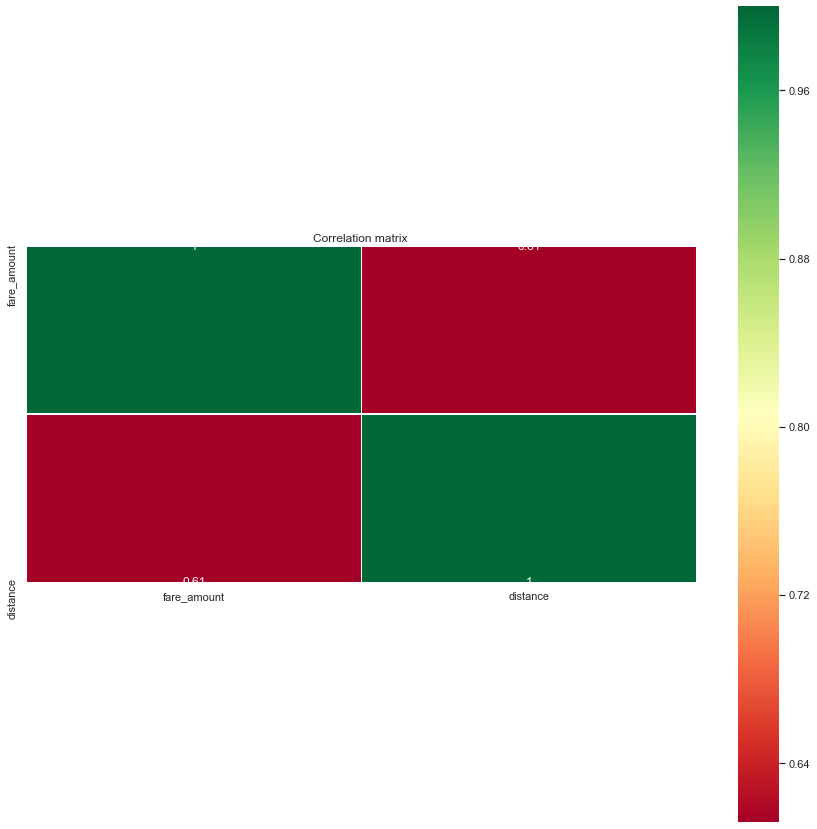

In [84]:
#Plotting correlation graph for the variables to look the correlation among variables.
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(Cab_Train_Data[num_var].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
#plt.savefig('correlation.png')
plt.show()

In [85]:
#ANOVA Test for variance analysis
#It lets us know the means for different groups are same or not. 
#Hypothesis testing :
#Null Hypothesis: mean of all categories in a variable are same.
#Alternate Hypothesis: mean of at least one category in a variable is different.
#If p-value is less than 0.05 then we reject the null hypothesis and greater than 0.05 then we accept the null hypothesis.

model = ols('fare_amount ~ C(passenger_count_2)+C(passenger_count_3)+C(passenger_count_4)+C(passenger_count_5)+C(passenger_count_6)+C(season_spring)+C(season_summer)+C(season_winter)+C(week_weekend)+C(sessions_night_AM)+C(sessions_night_PM)+C(sessions_evening)+C(sessions_morning)+C(year_2010)+C(year_2011)+C(year_2012)+C(year_2013)+C(year_2014)+C(year_2015)',data=Cab_Train_Data).fit()
                
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count_2),1.0,10.143360,10.143360,0.664134,4.151166e-01
C(passenger_count_3),1.0,11.631197,11.631197,0.761550,3.828573e-01
C(passenger_count_4),1.0,83.429285,83.429285,5.462513,1.944124e-02
C(passenger_count_5),1.0,26.346008,26.346008,1.724999,1.890701e-01
C(passenger_count_6),1.0,181.104035,181.104035,11.857744,5.757248e-04
C(season_spring),1.0,46.306709,46.306709,3.031921,8.166098e-02
C(season_summer),1.0,24.691308,24.691308,1.616658,2.035774e-01
C(season_winter),1.0,218.544561,218.544561,14.309154,1.556866e-04
C(week_weekend),1.0,27.376687,27.376687,1.792482,1.806435e-01
C(sessions_night_AM),1.0,902.107990,902.107990,59.065308,1.615514e-14


In [86]:
#Since every variable has p-value less than 0.05 therefore we reject the null hypothesis.

In [87]:
#Multicollinearity Test
outcome, predictors = dmatrices('fare_amount ~ distance+passenger_count_2+passenger_count_3+passenger_count_4+passenger_count_5+passenger_count_6+season_spring+season_summer+season_winter+week_weekend+sessions_night_AM+sessions_night_PM+sessions_evening+sessions_morning+year_2010+year_2011+year_2012+year_2013+year_2014+year_2015',Cab_Train_Data, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,15.504918,Intercept
1,1.040512,passenger_count_2[T.1]
2,1.019458,passenger_count_3[T.1]
3,1.011721,passenger_count_4[T.1]
4,1.024861,passenger_count_5[T.1]
5,1.017256,passenger_count_6[T.1]
6,1.642376,season_spring[T.1]
7,1.552574,season_summer[T.1]
8,1.587430,season_winter[T.1]
9,1.051441,week_weekend[T.1]


In [88]:
#VIF is always greater or equal to 1.If there are multiple variables with VIF greater than 5, we remove the variable with the highest VIF.
#In our case VIF is very low that means our dataset has low multicollinearity

In [89]:
######################################## FEATURE SCALING ########################################################

(array([ 337.,   99.,  193.,  371.,  539.,  684.,  791.,  783.,  824.,
         776.,  759.,  620.,  695., 1153.,  562.,  528.,  499.,  465.,
         404.,  398.,  372.,  321.,  294.,  270.,  277.,  266.,  208.,
         193.,  198.,  198.,  182.,  160.,  162.,  129.,  156.,  119.,
         104.,   87.,   99.,   84.,   81.,   90.,   70.,   60.]),
 array([0.        , 0.09148377, 0.18296754, 0.27445131, 0.36593508,
        0.45741885, 0.54890262, 0.6403864 , 0.73187017, 0.82335394,
        0.91483771, 1.00632148, 1.09780525, 1.18928902, 1.28077279,
        1.37225656, 1.46374033, 1.5552241 , 1.64670787, 1.73819165,
        1.82967542, 1.92115919, 2.01264296, 2.10412673, 2.1956105 ,
        2.28709427, 2.37857804, 2.47006181, 2.56154558, 2.65302935,
        2.74451312, 2.8359969 , 2.92748067, 3.01896444, 3.11044821,
        3.20193198, 3.29341575, 3.38489952, 3.47638329, 3.56786706,
        3.65935083, 3.7508346 , 3.84231837, 3.93380214, 4.02528592]),
 <a list of 44 Patch objects>)

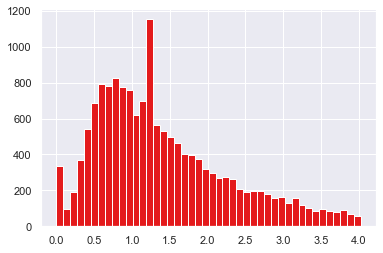

In [90]:
#Normality check
plt.hist(Cab_Train_Data["distance"],bins="auto")
#plt.savefig('Normality_check_Python.png')

In [91]:
#Since data is not normally distributed so applying normalization method to normalize datasets
Cab_Train_Data['distance'] = (Cab_Train_Data['distance'] - min(Cab_Train_Data['distance']))/(max(Cab_Train_Data['distance']) - min(Cab_Train_Data['distance']))
Cab_Test_Data['distance'] = (Cab_Test_Data['distance'] - min(Cab_Test_Data['distance']))/(max(Cab_Test_Data['distance']) - min(Cab_Test_Data['distance']))

In [92]:


#Splitting train into train and validation subsets
#train,test = train_test_split(Cab_Train_Data, test_size = 0.2)
         ######################## Or #####################


In [93]:

#Splitting train into train and validation subsets
X = Cab_Train_Data.drop('fare_amount',axis=1).values
Y = Cab_Train_Data['fare_amount'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)


In [94]:

################################### LINEAR REGRESSION ######################################################################

#Running regression model
model_LR = LinearRegression().fit(X_train,Y_train)

In [95]:
#Making predictions
prediction_LR=model_LR.predict(X_test)

In [96]:
#Displaying predicted values
prediction_LR


array([5.54133695, 6.52949837, 7.64841659, ..., 7.24991755, 7.37326752,
       7.67713501])

In [97]:
#Function for calculating error rate
def MAPE(actual , predicted):
    mape=np.mean(np.abs((actual-predicted)/predicted))*100
    return mape



In [98]:
#Calculate MAPE
MAPE(Y_test,prediction_LR)

25.119894528549107

In [99]:
#Linear Regression model

#Error rate = 25.1 
#Accuracy = 74.9% 

In [100]:
####################################### DECISION TREE ALGORITHM ################################################


#Running regression  DT model
model_DT=DecisionTreeRegressor(max_depth=10).fit(X_train,Y_train)



In [101]:
#Making predictions
predictions_DT=model_DT.predict(X_test)
predictions_DT

array([ 5.20948905,  6.68766141, 15.7125    , ...,  6.68766141,
        7.06647399,  6.68766141])

In [102]:
#Function for calculating error rate
def MAPE(actual , predicted):
    mape=np.mean(np.abs((actual-predicted)/predicted))*100
    return mape

#Calculate MAPE
MAPE(Y_test,predictions_DT)

23.698193676064726

In [103]:
#Decision Tree Algorithm

#Error rate = 23.6
#Accuracy = 76.4%

In [104]:

####################################### RANDOM FOREST ALGORITHM ################################################

#Splitting train into train and validation subsets

X = Cab_Train_Data.drop('fare_amount',axis=1).values
Y = Cab_Train_Data['fare_amount'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)


In [105]:
#Running Random Forest model
model_RF = RandomForestRegressor(n_estimators=600,max_features=5).fit(X_train,Y_train)


In [106]:
#Making predictions
predictions_RF=model_RF.predict(X_test)

In [107]:
#viewing predicted values
predictions_RF

array([ 4.65366667,  5.59383333, 12.51536111, ...,  8.28066667,
        7.16166667, 10.913     ])

In [108]:
#Function for calculating error rate
def MAPE(actual , predicted):
    mape=np.mean(np.abs((actual-predicted)/predicted))*100
    return mape

In [109]:
#Calculate MAPE
MAPE(Y_test,predictions_RF)

24.830390625372488

In [110]:
#Random Forest model

#Error rate= 24.8
#Accuracy= 75.2%

In [111]:
##################################### XGBOOST ALGORITHM ###########################################################

In [112]:
#Splitting train into train and validation subsets

X = Cab_Train_Data.drop('fare_amount',axis=1).values
Y = Cab_Train_Data['fare_amount'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)


In [113]:
#Running XGboost algorithm
Xgb = XGBRegressor()
Xgb.fit(X_train,Y_train)

[21:00:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [114]:
#Making Predictions 
prediction_xgb = Xgb.predict(X_test)


In [115]:
#Displaying predicted values obtained from predict() method of xgboost model
prediction_xgb 

array([ 5.185576 ,  6.199656 , 13.329259 , ...,  8.52641  ,  6.2573977,
       10.501133 ], dtype=float32)

In [116]:
#Function for calculating error rate
def MAPE(actual , predicted):
    mape=np.mean(np.abs((actual-predicted)/predicted))*100
    return mape

In [117]:
#Calculate MAPE
MAPE(Y_test,prediction_xgb)

22.64223541018341

In [118]:
#XGBOOST model

#Error rate = 22.6
#Accuracy = 77.4%

In [119]:
######################### CAB FARE PREDICTION ##############################################

In [120]:
#Selecting XGBOOST algorithm than other algorithms as it has comparatively low error rate and better accuracy when compared with other models
#Using XGBOOST model for cab fare prediction

#loading test dataset
Test_data=pd.read_csv('test.csv')
test_pickup_datetime=Test_data['pickup_datetime']

In [121]:
#predicting fare_amount from test dataset 
Fare_prediction =Xgb.predict(Cab_Test_Data.values)


In [122]:
#Viewing predicted fare_amount
Fare_prediction

array([6.954877 , 5.969587 , 5.510411 , ..., 7.5579643, 6.2668858,
       7.797482 ], dtype=float32)

In [123]:
#Prediction of fare_amount with respect to the test data
Cab_Fare_Prediction = pd.DataFrame({"pickup_datetime":test_pickup_datetime,"fare_amount" : Fare_prediction})


In [124]:
#Displaying predicted fare_amount for test dataset
Cab_Fare_Prediction

,pickup_datetime,fare_amount
0,2015-01-27 13:08:24 UTC,6.954877
1,2015-01-27 13:08:24 UTC,5.969587
2,2011-10-08 11:53:44 UTC,5.510411
3,2012-12-01 21:12:12 UTC,7.531249
4,2012-12-01 21:12:12 UTC,5.207213
...,...,...
9909,2015-05-10 12:37:51 UTC,8.910440
9910,2015-01-12 17:05:51 UTC,5.645076
9911,2015-04-19 20:44:15 UTC,7.557964
9912,2015-01-31 01:05:19 UTC,6.266886


In [125]:
#writing csv file
Cab_Fare_Prediction.to_csv("Cab_Fare_Prediction_By_Python.csv",index=False)
